Objective: Analyze customers' transactions and credit profiles to figure out a target group for the launch of AtliQo bank credit card

#### Importing the neccessary libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#coonecting the database and loading the data or reada it from mysql database

In [26]:
#!pip install mysql-connector-python


#### Data Import

In [10]:
import mysql.connector

In [32]:
conn = mysql.connector.connect(
    host="127.0.0.1",       
    user="root",           
    password="sangamesh@96", 
    database="e_master_card",
     port=3306  
)

In [36]:
if conn.is_connected():
    query = "SELECT * FROM customers"
    df_cust = pd.read_sql(query, conn)
    print(df_cust.head())
else:
    print("Connection is not available.")

   cust_id            name  gender  age location      occupation  \
0        1   Manya Acharya  Female    2     City  Business Owner   
1        2   Anjali Pandey  Female   47     City      Consultant   
2        3  Aaryan Chauhan    Male   21     City      Freelancer   
3        4      Rudra Bali    Male   24    Rural      Freelancer   
4        5    Advait Malik    Male   48     City      Consultant   

   annual_income marital_status  
0         358211        Married  
1          65172         Single  
2          22378        Married  
3          33563        Married  
4          39406        Married  


In [34]:
query = "select * from customers"

df_cust=pd.read_sql(query,conn)
df_cust.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211,Married
1,2,Anjali Pandey,Female,47,City,Consultant,65172,Single
2,3,Aaryan Chauhan,Male,21,City,Freelancer,22378,Married
3,4,Rudra Bali,Male,24,Rural,Freelancer,33563,Married
4,5,Advait Malik,Male,48,City,Consultant,39406,Married


In [41]:
df_tran = pd.read_sql("select * from transactions",conn)
df_tran.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking


In [43]:
df_cs=pd.read_sql("select * from credit_profiles",conn)
df_cs.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
0,1,749,0.585171,19571.0,0.0,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0
2,3,544,0.854807,513.0,4.0,1000.0
3,4,504,0.336938,224.0,2.0,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0


In [45]:
conn.close()

Yes, it’s good practice to close the database connection once you’ve finished using it. Keeping connections open unnecessarily can lead to resource leaks and may eventually exhaust the maximum connections allowed by the database.

##### Loading the dataset using read_csv

In [65]:
df_cust_new = pd.read_csv('datasets/customers.csv')

df_trans_new = pd.read_csv('datasets/transactions.csv')

In [468]:
df_cs_new = pd.read_csv('datasets/credit_profiles.csv')

In [ ]:
#analyse

In [67]:
df_cust_new.shape

(1000, 8)

In [69]:
df_cust_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   cust_id         1000 non-null   int64  
 1   name            1000 non-null   object 
 2   gender          1000 non-null   object 
 3   age             1000 non-null   int64  
 4   location        1000 non-null   object 
 5   occupation      1000 non-null   object 
 6   annual_income   950 non-null    float64
 7   marital_status  1000 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 62.6+ KB


In [71]:
df_cust_new.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,950.000000
mean,500.500000,36.405000,139410.314737
std,288.819436,15.666155,112416.802007
min,1.000000,1.000000,2.000000
25%,250.750000,26.000000,47627.500000
50%,500.500000,32.000000,112218.500000
75%,750.250000,46.000000,193137.500000
max,1000.000000,135.000000,449346.000000


In [75]:
df_cust_new[df_cust_new.duplicated()]
#if duplicates are there 
#df_cust = df_cust.drop_duplicates()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status


In [73]:
df_cust_new.isnull().sum()

cust_id            0
name               0
gender             0
age                0
location           0
occupation         0
annual_income     50
marital_status     0
dtype: int64

In [85]:
df_cust_new[df_cust_new["annual_income"].isna()].shape

(50, 8)

In [ ]:
#logical imputation of null values

In [120]:
occupation_wise_median=df_cust_new.groupby("occupation")["annual_income"].median()
occupation_wise_median

occupation
Accountant              65265.0
Artist                  45794.0
Business Owner         261191.5
Consultant              58017.0
Data Scientist         135759.0
Freelancer              46759.0
Fullstack Developer     76774.0
Name: annual_income, dtype: float64

In [100]:
def get_median_val(row):
    if pd.isnull(row["annual_income"]):
        return occupation_wise_median[row["occupation"]]
    else:
        return row["annual_income"]

In [108]:
get_median_val({"cust_id":1,"occupation":"Artist","annual_income":None})

45794.0

In [114]:
df_cust_new["annual_income"]=df_cust_new.apply(lambda x: occupation_wise_median[x["occupation"]] if pd.isnull(x["annual_income"]) else x["annual_income"],
              axis=1)

In [122]:
df_cust_new.isnull().sum()

cust_id           0
name              0
gender            0
age               0
location          0
occupation        0
annual_income     0
marital_status    0
dtype: int64

In [124]:
df_cust_new.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211.0,Married
1,2,Anjali Pandey,Female,47,City,Consultant,65172.0,Single
2,3,Aaryan Chauhan,Male,21,City,Freelancer,22378.0,Married
3,4,Rudra Bali,Male,24,Rural,Freelancer,33563.0,Married
4,5,Advait Malik,Male,48,City,Consultant,39406.0,Married


<Axes: xlabel='annual_income', ylabel='Count'>

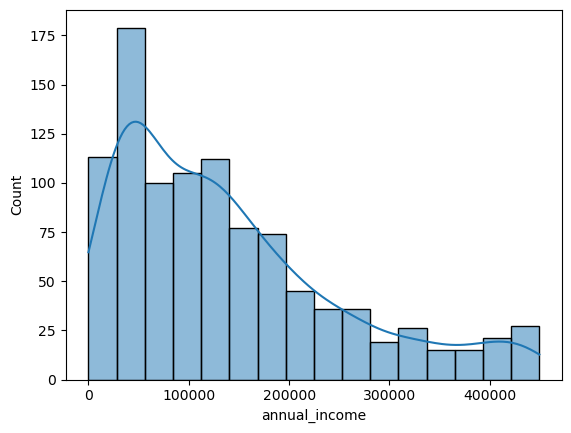

In [126]:
sns.histplot(df_cust_new["annual_income"],kde=True)

In [128]:
df_cust_new.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,1000.000000
mean,500.500000,36.405000,138916.765500
std,288.819436,15.666155,110969.408643
min,1.000000,1.000000,2.000000
25%,250.750000,26.000000,48229.500000
50%,500.500000,32.000000,113416.000000
75%,750.250000,46.000000,192614.000000
max,1000.000000,135.000000,449346.000000


In [138]:
#this is the second method instead of applying a function where we replaced null values with median values according to the occupation
for index,row in df_cust_new.iterrows():
    if row["annual_income"]<100:
        df_cust_new.at[index,"annual_income"]=occupation_wise_median[row["occupation"]]       

In [145]:
df_cust_new[df_cust_new["annual_income"]<100]
#no values are less than 100,we trated outliers with median values(replaced)

,cust_id,name,gender,age,location,occupation,annual_income,marital_status


In [150]:
occupation_wise_mean=df_cust_new.groupby("occupation")["annual_income"].mean().round(2)
occupation_wise_mean

occupation
Accountant              64123.56
Artist                  45309.24
Business Owner         268447.37
Consultant              60703.15
Data Scientist         137021.27
Freelancer              76327.51
Fullstack Developer     78727.97
Name: annual_income, dtype: float64

In [152]:
occupation_wise_mean.index

Index(['Accountant', 'Artist', 'Business Owner', 'Consultant',
       'Data Scientist', 'Freelancer', 'Fullstack Developer'],
      dtype='object', name='occupation')

In [154]:
occupation_wise_mean.values

array([ 64123.56,  45309.24, 268447.37,  60703.15, 137021.27,  76327.51,
        78727.97])

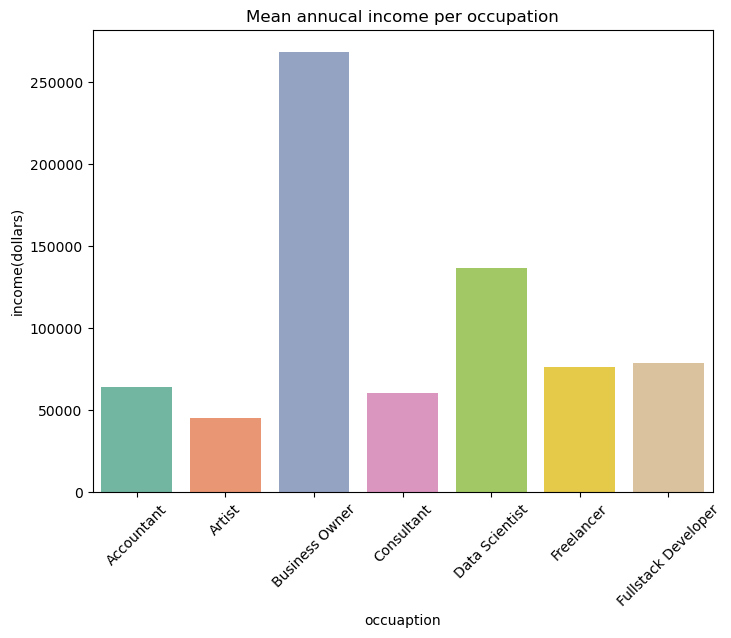

In [172]:
plt.figure(figsize=(8,6))

sns.barplot(x=occupation_wise_mean.index,y=occupation_wise_mean.values,palette="Set2")

plt.xticks(rotation=45)

plt.title("Mean annucal income per occupation")
plt.xlabel("occuaption")
plt.ylabel('income(dollars)')

plt.show()

In [176]:
df_cust_new.select_dtypes(include="object").columns

Index(['name', 'gender', 'location', 'occupation', 'marital_status'], dtype='object')

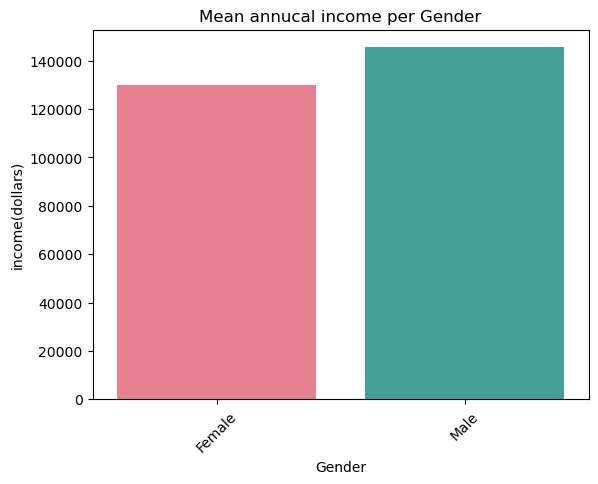

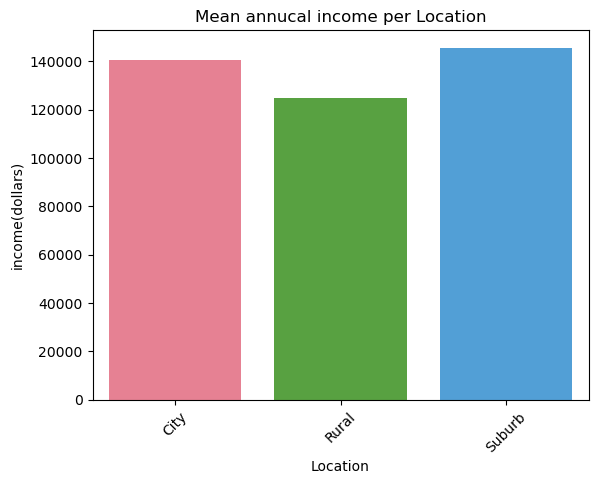

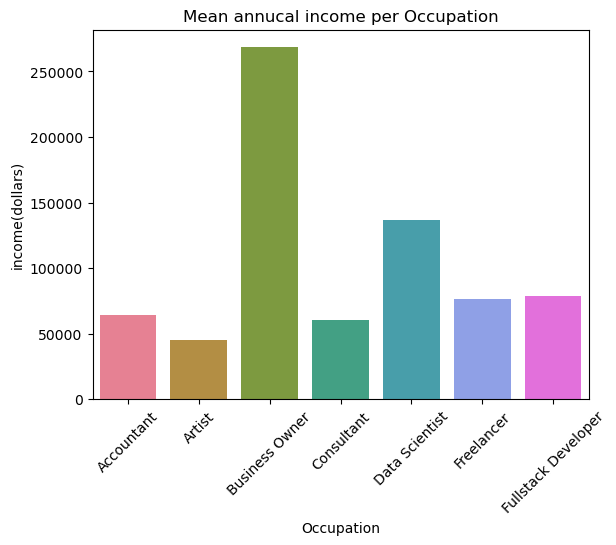

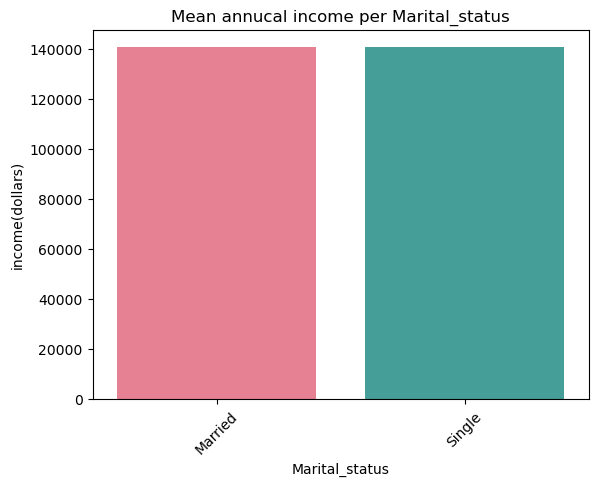

In [187]:
categorical_columns=["gender",'location', 'occupation', 'marital_status']

for col in categorical_columns:
    avg_income_per_group=df_cust_new.groupby(col)["annual_income"].mean()

    
    sns.barplot(x=avg_income_per_group.index,y=avg_income_per_group.values,palette="husl")

    plt.xticks(rotation=45)

    plt.title(f"Mean annucal income per {col.capitalize()}")
    plt.xlabel(f"{col.capitalize()}")
    plt.ylabel('income(dollars)')

    plt.show()

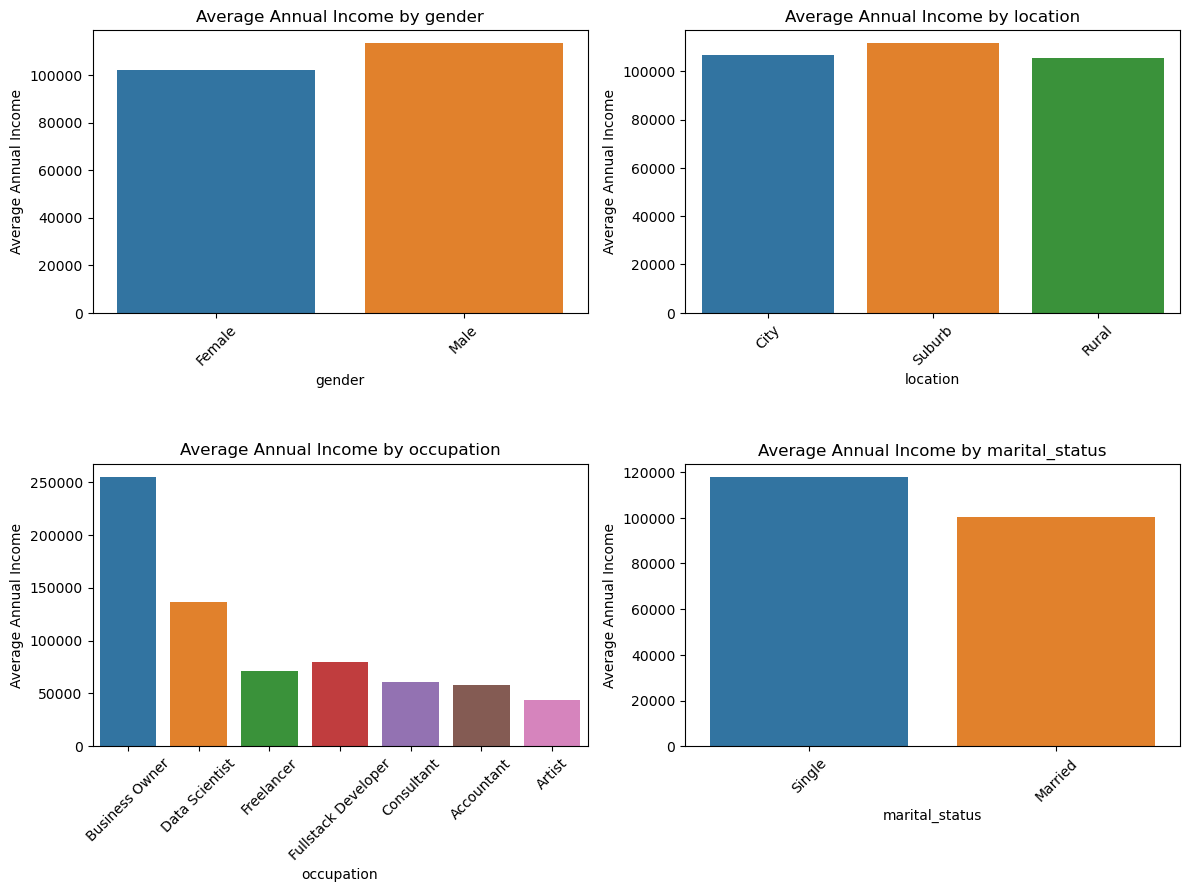

In [197]:

# List of categorical columns
categorical_columns = ['gender', 'location', 'occupation', 'marital_status']

num_rows = 2
# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 4 * num_rows))

# Flatten the axes array to make it easier to iterate
axes = axes.flatten()

# Create subplots for each categorical column
for i, cat_col in enumerate(categorical_columns):
    # Calculate the average annual income for each category
    avg_income_by_category = df_cust_new.groupby(categorical_columns)['annual_income'].mean().reset_index()
    
    # Sort the data by 'annual_income' before plotting
    sorted_data = avg_income_by_category.sort_values(by='annual_income', ascending=False)
    
    sns.barplot(x=cat_col, y='annual_income', data=sorted_data, ci=None, ax=axes[i], palette='tab10')
    axes[i].set_title(f'Average Annual Income by {cat_col}')
    axes[i].set_xlabel(cat_col)
    axes[i].set_ylabel('Average Annual Income')

    # Rotate x-axis labels for better readability
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

# Hide any unused subplots
for i in range(len(categorical_columns), len(axes)):
    fig.delaxes(axes[i])
plt.tight_layout()
plt.show()

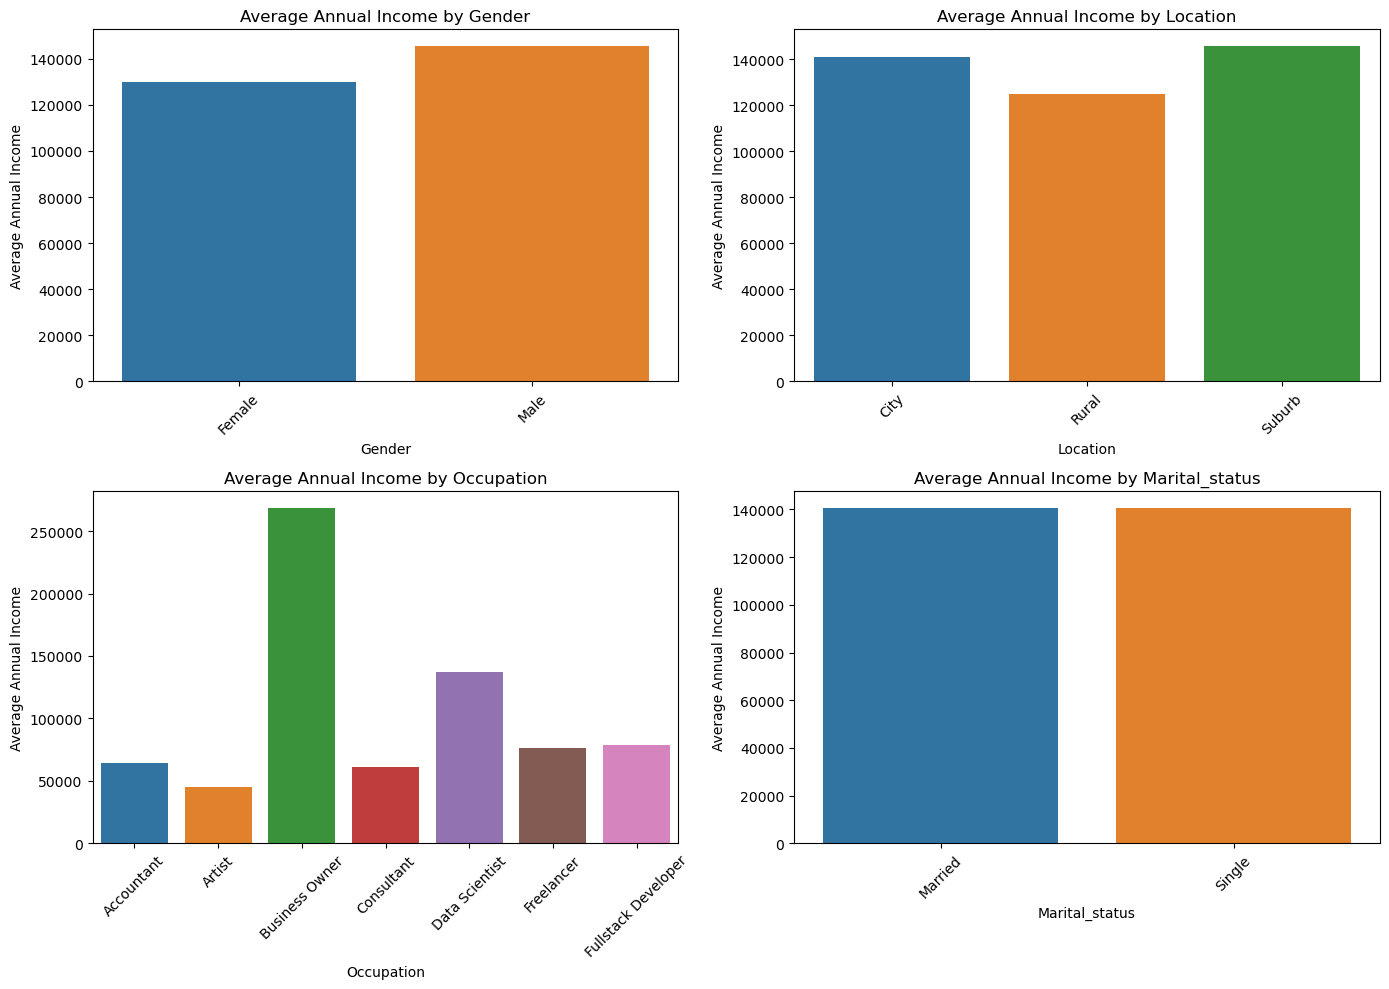

In [988]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define categorical columns
categorical_columns = ["gender", 'location', 'occupation', 'marital_status']

# Create subplots with 2 rows and 2 columns (total of 4 plots)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Loop over each categorical column and corresponding subplot axis
for idx, col in enumerate(categorical_columns):
    # Calculate average income per category
    avg_income_by_category = df_cust_new.groupby(col)["annual_income"].mean()

    # Plot on the respective subplot
    sns.barplot(x=avg_income_by_category.index, y=avg_income_by_category.values, ax=axes[idx],palette="tab10")
    
    # Set titles and labels
    axes[idx].set_title(f'Average Annual Income by {col.capitalize()}')
    axes[idx].set_xlabel(col.capitalize())
    axes[idx].set_ylabel('Average Annual Income')
    axes[idx].tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [ ]:
#In our customers’ dataframe, the age column has some outliers.
#Detect and treat them using an approach that you feel is the best based on your learning in this course.
#Your business manager has told you that age is valid only if it is between 15 and 80 years.



In [244]:
#analyse age column

In [250]:
df_cust_new["age"].isnull().sum()

0

In [228]:
df_cust_new["age"].describe()

count    1000.000000
mean       36.405000
std        15.666155
min         1.000000
25%        26.000000
50%        32.000000
75%        46.000000
max       135.000000
Name: age, dtype: float64

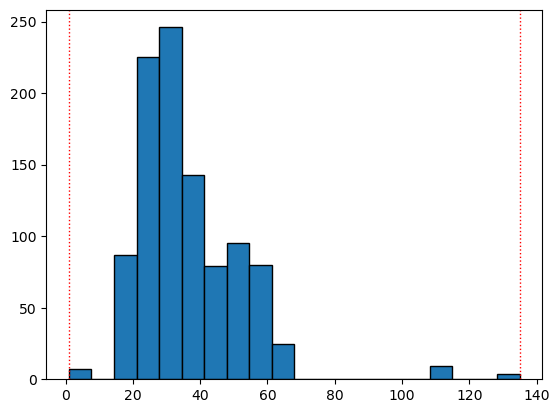

In [262]:
plt.hist(df_cust_new["age"],bins=20,edgecolor="black")

plt.axvline(df_cust_new["age"].min(),ls="dotted",lw=1,color="r")
plt.axvline(df_cust_new["age"].max(),ls="dotted",lw=1,color="r")

plt.show()

In [234]:
df_cust_new[(df_cust_new["age"]<15)|(df_cust_new["age"]>80)].shape

(20, 8)

In [268]:
outliers=df_cust_new[(df_cust_new["age"]<15)|(df_cust_new["age"]>80)]
outliers

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211.0,Married
41,42,Aaryan Shah,Male,110,City,Artist,7621.0,Married
165,166,Sia Dutta,Female,1,City,Freelancer,39721.0,Single
174,175,Rohan Sharma,Male,110,City,Freelancer,23723.0,Married
222,223,Arjun Batra,Male,110,Suburb,Freelancer,210987.0,Married
277,278,Aarav Tandon,Male,110,City,Consultant,96522.0,Single
295,296,Ayush Pandey,Male,1,Rural,Accountant,55254.0,Married
325,326,Virat Goel,Male,110,City,Accountant,61021.0,Single
610,611,Rehan Verma,Male,135,Rural,Business Owner,444776.0,Married
692,693,Dhruv Jha,Male,1,City,Business Owner,83045.0,Married


In [ ]:
#here we can see as per the condition give,there are20 outliers in this column

In [240]:
median_age=df_cust_new["age"].median()
median_age

32.0

In [266]:
#removing the outliers or treat the outliers

occupation_wise_median_age=df_cust_new.groupby("occupation")["age"].median()
occupation_wise_median_age

occupation
Accountant             31.5
Artist                 26.0
Business Owner         51.0
Consultant             46.0
Data Scientist         32.0
Freelancer             24.0
Fullstack Developer    27.5
Name: age, dtype: float64

In [274]:
df_cust_new["age"]=df_cust_new.apply(lambda x : occupation_wise_median_age[x["occupation"]] if x["age"]<15 or x["age"]>80 else x["age"],axis=1)


In [ ]:
#second method
#for index,row in outliers.iterrows():
#        df_cust_new.at(index,"age")=occupation_wise_median_age[row["occupation"]]

In [276]:
df_cust_new[(df_cust_new["age"]<15)|(df_cust_new["age"]>80)]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status


In [278]:
df_cust_new["age"].describe()

count    1000.000000
mean       35.541500
std        12.276634
min        18.000000
25%        26.000000
50%        32.000000
75%        44.250000
max        64.000000
Name: age, dtype: float64

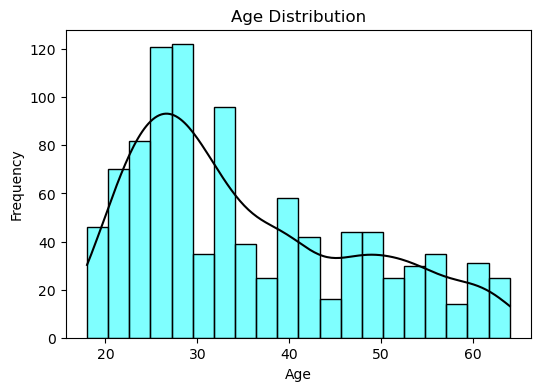

In [296]:
plt.figure(figsize=(6,4))

sns.histplot(df_cust_new["age"], 
    bins=20, 
    kde=True, 
    color="cyan", 
    edgecolor="black"
)
# Manually set the KDE line color to black
for line in plt.gca().get_lines():
    line.set_color("black")
    
# Add title and labels
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")

# Show plot
plt.show()

In [308]:
bins_edge=[17,25,48,65]
labels=["18-25","26-48","49-65"]

df_cust_new["age_group"]=pd.cut(df_cust_new["age"],bins=bins_edge,labels=labels)
df_cust_new.head()


,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,26-48
2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married,18-25
3,4,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married,18-25
4,5,Advait Malik,Male,48.0,City,Consultant,39406.0,Married,26-48


The bins_edge list [17, 25, 48, 65] specifies the edges of the bins:

17 is the start of the first group (17 and above).
25, 48, and 65 are the edges separating each age group.
Each range will include the left edge but exclude the right, i.e., [17, 25) for the first bin (meaning 17 to 24).

In [318]:
age_class=df_cust_new["age_group"].value_counts()
age_class

age_group
26-48    567
18-25    246
49-65    187
Name: count, dtype: int64

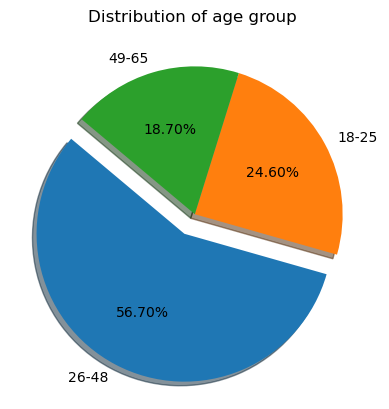

In [348]:
plt.pie(x=age_class.values,labels=age_class.index, autopct="%1.2f%%" ,shadow=True,explode=[0.15,0,0],startangle=140)

plt.title("Distribution of age group ")

plt.show()

In [357]:
location_wise=df_cust_new["location"].value_counts()
location_wise

location
City      683
Suburb    232
Rural      85
Name: count, dtype: int64

In [400]:
from collections import Counter
counts=Counter(df_cust_new["location"])
counts

Counter({'City': 683, 'Suburb': 232, 'Rural': 85})

In [896]:
customer_location_gender=df_cust_new.groupby(["location","gender"]).size().unstack()
customer_location_gender

gender,Female,Male
location,,
City,226,457
Rural,26,59
Suburb,74,158


In [898]:
pd.pivot_table(df_cust_new, index="location", columns="gender", aggfunc='size')



gender,Female,Male
location,,
City,226,457
Rural,26,59
Suburb,74,158


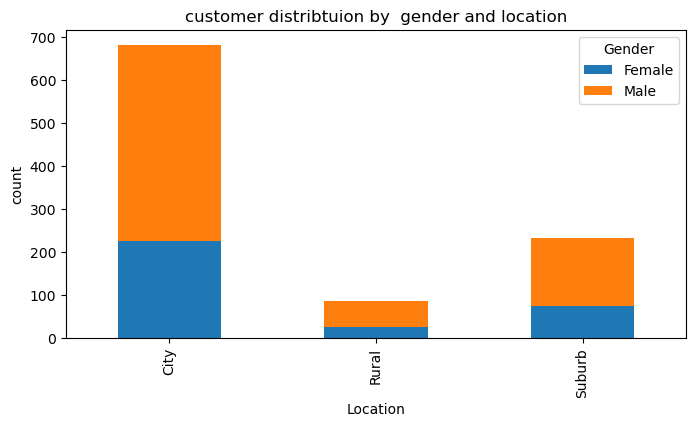

In [380]:
customer_location_gender.plot(kind="bar",stacked=True,figsize=(8,4))

plt.legend(title="Gender")
plt.title("customer distribtuion by  gender and location")
plt.xlabel("Location")
plt.ylabel("count")

plt.show()

### Credit_score Dataset Analysis

In [ ]:
#loading the dataset

In [527]:
df_cs_new = pd.read_csv('datasets/credit_profiles.csv')

In [ ]:
#top tow rows of a credit score dataset

In [529]:
df_cs_new.head(2)

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
0,1,749,0.585171,19571.0,0.0,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0


In [ ]:
#information of dataset 

In [531]:
df_cs_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   cust_id                         1004 non-null   int64  
 1   credit_score                    1004 non-null   int64  
 2   credit_utilisation              1000 non-null   float64
 3   outstanding_debt                1000 non-null   float64
 4   credit_inquiries_last_6_months  1000 non-null   float64
 5   credit_limit                    935 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 47.2 KB


In [533]:
df_cs_new["cust_id"].nunique()

1000

In [ ]:
#check for duplicates

In [535]:
df_cs_new[df_cs_new["cust_id"].duplicated(keep=False)]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
516,517,308,NaN,NaN,NaN,NaN
517,517,308,0.113860,33.0,3.0,500.0
569,569,344,NaN,NaN,NaN,NaN
570,569,344,0.112599,37.0,0.0,500.0
607,606,734,NaN,NaN,NaN,NaN
608,606,734,0.193418,4392.0,1.0,40000.0
664,662,442,NaN,NaN,NaN,NaN
665,662,442,0.856039,266.0,2.0,500.0


In [537]:
df_cs_new=df_cs_new.drop_duplicates(subset="cust_id",keep="last")
df_cs_new.shape

(1000, 6)

In [539]:
df_cs_new[df_cs_new["cust_id"].duplicated(keep=False)]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit


In [ ]:
#no duplicates

In [541]:
df_cs_new.isnull().sum()

cust_id                            0
credit_score                       0
credit_utilisation                 0
outstanding_debt                   0
credit_inquiries_last_6_months     0
credit_limit                      65
dtype: int64

In [543]:
df_cs_new[df_cs_new["credit_limit"].isnull()]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
10,11,679,0.557450,9187.0,2.0,NaN
35,36,790,0.112535,4261.0,1.0,NaN
37,38,514,0.296971,238.0,2.0,NaN
45,46,761,0.596041,24234.0,2.0,NaN
64,65,734,0.473715,13631.0,0.0,NaN
...,...,...,...,...,...,...
912,909,479,0.487555,320.0,3.0,NaN
931,928,311,0.832244,316.0,2.0,NaN
948,945,526,0.272734,227.0,1.0,NaN
954,951,513,0.175914,131.0,3.0,NaN


In [545]:
df_cs_new.credit_limit.value_counts()

credit_limit
500.0      229
60000.0    186
40000.0    137
1500.0     100
1000.0      90
750.0       76
1250.0      75
20000.0     42
Name: count, dtype: int64

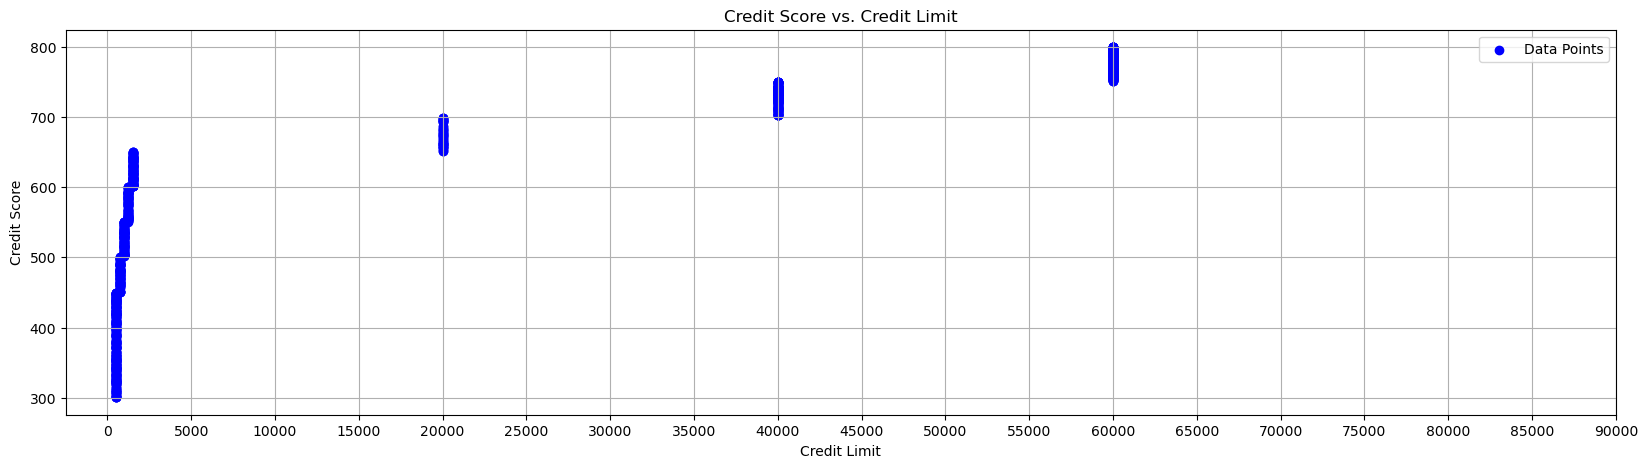

In [547]:
plt.figure(figsize=(20, 5))
plt.scatter(df_cs_new['credit_limit'], df_cs_new['credit_score'], c='blue', marker='o', label='Data Points')

# Customize the plot
plt.title('Credit Score vs. Credit Limit')
plt.xlabel('Credit Limit')
plt.ylabel('Credit Score')

# Adjust the y-axis bin interval to 1000
plt.xticks(range(0, 90001, 5000))
plt.grid(True)

# Show the plot
plt.legend()
plt.show()

In [551]:
df_cs_new[df_cs_new["credit_limit"].isnull()].head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
10,11,679,0.557450,9187.0,2.0,NaN
35,36,790,0.112535,4261.0,1.0,NaN
37,38,514,0.296971,238.0,2.0,NaN
45,46,761,0.596041,24234.0,2.0,NaN
64,65,734,0.473715,13631.0,0.0,NaN


In [557]:
def null_value_imputation(row):
    if pd.isnull(row["credit_limit"]):
        return round(row["outstanding_debt"]/row["credit_utilisation"])
    else:
        return row["credit_limit"]

In [559]:
null_value_imputation({"credit_utilisation":0.557450,"outstanding_debt":9187.0,"credit_limit":None})

16480

In [561]:
df_cs_new["credit_limit"]=df_cs_new.apply(null_value_imputation,axis=1)

In [563]:
df_cs_new.isnull().sum()

cust_id                           0
credit_score                      0
credit_utilisation                0
outstanding_debt                  0
credit_inquiries_last_6_months    0
credit_limit                      0
dtype: int64

In [565]:
# Define bin ranges
bin_ranges = [300, 450, 500, 550, 600, 650, 700, 750, 800]

# Create labels for the bins
bin_labels = [f'{start}-{end-1}' for start, end in zip(bin_ranges, bin_ranges[1:])]

# Use pd.cut to assign data to bins
df_cs_new['credit_score_range'] = pd.cut(df_cs_new['credit_score'], bins=bin_ranges, labels=bin_labels, include_lowest=True, right=False)

In [567]:
df_cs_new.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
0,1,749,0.585171,19571.0,0.0,40000.0,700-749
1,2,587,0.107928,161644.0,2.0,1250.0,550-599
2,3,544,0.854807,513.0,4.0,1000.0,500-549
3,4,504,0.336938,224.0,2.0,1000.0,500-549
4,5,708,0.586151,18090.0,2.0,40000.0,700-749


In [569]:
df_cs_new.loc[[10,35,37,45,64,912,931,948]]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
10,11,679,0.557450,9187.0,2.0,16480.0,650-699
35,36,790,0.112535,4261.0,1.0,37864.0,750-799
37,38,514,0.296971,238.0,2.0,801.0,500-549
45,46,761,0.596041,24234.0,2.0,40658.0,750-799
64,65,734,0.473715,13631.0,0.0,28775.0,700-749
912,909,479,0.487555,320.0,3.0,656.0,450-499
931,928,311,0.832244,316.0,2.0,380.0,300-449
948,945,526,0.272734,227.0,1.0,832.0,500-549


In [571]:
mode_df=df_cs_new.groupby("credit_score_range")["credit_limit"].agg(lambda x: x.mode().iloc[0]).reset_index()
mode_df

,credit_score_range,credit_limit
0,300-449,500.0
1,450-499,750.0
2,500-549,1000.0
3,550-599,1250.0
4,600-649,1500.0
5,650-699,20000.0
6,700-749,40000.0
7,750-799,60000.0


In [573]:
df_cs_new=pd.merge(df_cs_new,mode_df,on="credit_score_range",suffixes=("","_mode"))
df_cs_new

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
0,1,749,0.585171,19571.0,0.0,40000.0,700-749,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0,550-599,1250.0
2,3,544,0.854807,513.0,4.0,1000.0,500-549,1000.0
3,4,504,0.336938,224.0,2.0,1000.0,500-549,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0,700-749,40000.0
...,...,...,...,...,...,...,...,...
995,996,564,0.702963,688.0,2.0,1250.0,550-599,1250.0
996,997,774,0.465462,17139.0,0.0,60000.0,750-799,60000.0
997,998,529,0.585856,386.0,3.0,1000.0,500-549,1000.0
998,999,725,0.249670,6973.0,2.0,40000.0,700-749,40000.0


In [575]:
df_cs_new.loc[[10,35,37,45,64,912,931,948]]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
10,11,679,0.557450,9187.0,2.0,16480.0,650-699,20000.0
35,36,790,0.112535,4261.0,1.0,37864.0,750-799,60000.0
37,38,514,0.296971,238.0,2.0,801.0,500-549,1000.0
45,46,761,0.596041,24234.0,2.0,40658.0,750-799,60000.0
64,65,734,0.473715,13631.0,0.0,28775.0,700-749,40000.0
912,913,747,0.212175,4371.0,4.0,40000.0,700-749,40000.0
931,932,750,0.801095,18961.0,1.0,40000.0,750-799,60000.0
948,949,776,0.300995,15623.0,4.0,60000.0,750-799,60000.0


In [577]:
df_cs_new.describe()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_limit_mode
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000
mean,500.500000,589.182000,0.498950,9683.597000,1.955000,2.088828e+04,19912.500000
std,288.819436,152.284929,0.233139,25255.893671,1.414559,5.328818e+04,24840.914633
min,1.000000,300.000000,0.103761,33.000000,0.000000,2.520000e+02,500.000000
25%,250.750000,460.000000,0.293917,221.000000,1.000000,7.042500e+02,750.000000
50%,500.500000,601.500000,0.487422,550.000000,2.000000,1.250000e+03,1500.000000
75%,750.250000,738.000000,0.697829,11819.500000,3.000000,4.000000e+04,40000.000000
max,1000.000000,799.000000,0.899648,209901.000000,4.000000,1.509793e+06,60000.000000


<Axes: xlabel='outstanding_debt'>

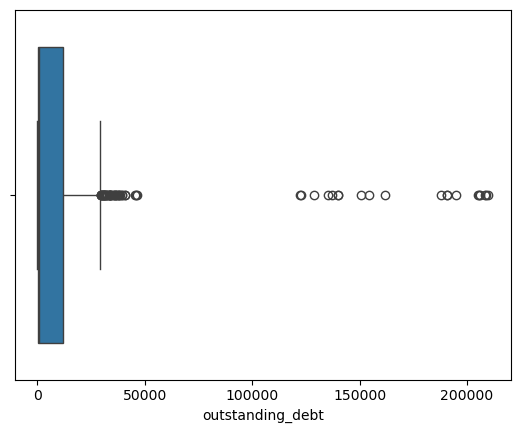

In [585]:
sns.boxplot(x=df_cs_new["outstanding_debt"])

In [595]:
outliers_new=df_cs_new[df_cs_new["outstanding_debt"]>df_cs_new["credit_limit"]]
outliers_new

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
1,2,587,0.107928,161644.0,2.0,1250.0,550-599,1250.0
19,20,647,0.439132,205014.0,3.0,1500.0,600-649,1500.0
25,26,758,0.250811,190838.0,2.0,60000.0,750-799,60000.0
38,39,734,0.573023,122758.0,3.0,40000.0,700-749,40000.0
93,94,737,0.739948,137058.0,2.0,40000.0,700-749,40000.0
204,205,303,0.364360,187849.0,0.0,500.0,300-449,500.0
271,272,703,0.446886,154568.0,1.0,40000.0,700-749,40000.0
330,331,799,0.363420,208898.0,4.0,60000.0,750-799,60000.0
350,351,320,0.285081,150860.0,0.0,500.0,300-449,500.0
446,447,754,0.178394,206191.0,2.0,60000.0,750-799,60000.0


In [ ]:
#to replace outstanding limit with credit limit where outstading debt greater than credit limit

In [601]:
for index,row in outliers_new.iterrows():
    if row["outstanding_debt"]>row["credit_limit"]:
        df_cs_new.at[index,"outstanding_debt"]=row["credit_limit"]

In [605]:
df_cs_new.loc[[1,19,25,38]]
#cross checkinng

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
1,2,587,0.107928,1250.0,2.0,1250.0,550-599,1250.0
19,20,647,0.439132,1500.0,3.0,1500.0,600-649,1500.0
25,26,758,0.250811,60000.0,2.0,60000.0,750-799,60000.0
38,39,734,0.573023,40000.0,3.0,40000.0,700-749,40000.0


In [607]:
# correlation 
# bi variate analysis

df_cs_new.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
0,1,749,0.585171,19571.0,0.0,40000.0,700-749,40000.0
1,2,587,0.107928,1250.0,2.0,1250.0,550-599,1250.0
2,3,544,0.854807,513.0,4.0,1000.0,500-549,1000.0
3,4,504,0.336938,224.0,2.0,1000.0,500-549,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0,700-749,40000.0


In [609]:
df_cust.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211.0,Married
1,2,Anjali Pandey,Female,47,City,Consultant,65172.0,Single
2,3,Aaryan Chauhan,Male,21,City,Freelancer,22378.0,Married
3,4,Rudra Bali,Male,24,Rural,Freelancer,33563.0,Married
4,5,Advait Malik,Male,48,City,Consultant,39406.0,Married


In [900]:
df_merged=pd.merge(df_cust_new,df_cs_new,on="cust_id",how="inner")
df_merged.shape

(1000, 16)

In [902]:
df_numerical=df_merged.select_dtypes(include=np.number)
num_col=df_numerical.columns

In [904]:
num_col

Index(['cust_id', 'age', 'annual_income', 'credit_score', 'credit_utilisation',
       'outstanding_debt', 'credit_inquiries_last_6_months', 'credit_limit',
       'credit_limit_mode'],
      dtype='object')

In [906]:
correlation_matrix=df_merged[["annual_income","credit_score","credit_utilisation","outstanding_debt","credit_limit"]].corr()
correlation_matrix


,annual_income,credit_score,credit_utilisation,outstanding_debt,credit_limit
annual_income,1.000000,0.575751,-0.086368,0.475405,0.324820
credit_score,0.575751,1.000000,-0.070445,0.584742,0.412515
credit_utilisation,-0.086368,-0.070445,1.000000,0.143456,-0.078574
outstanding_debt,0.475405,0.584742,0.143456,1.000000,0.766744
credit_limit,0.324820,0.412515,-0.078574,0.766744,1.000000


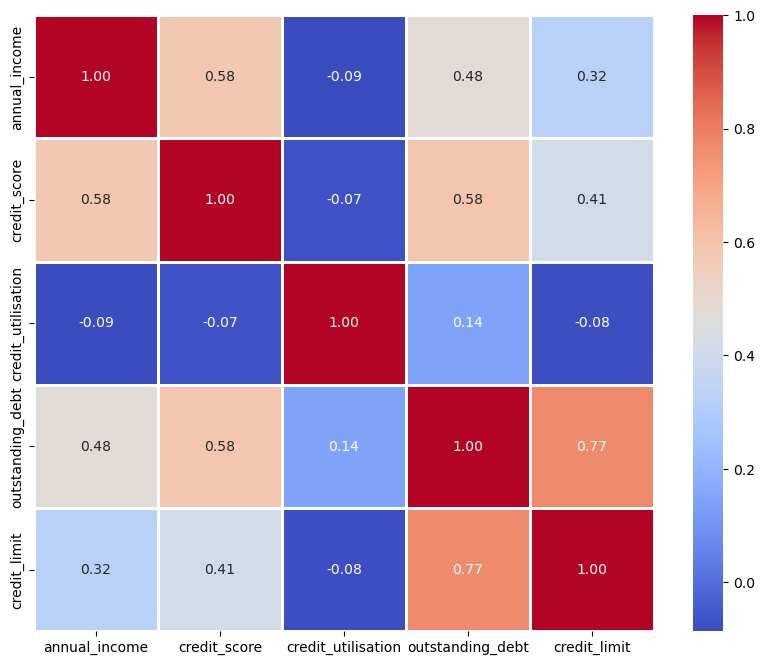

In [908]:
plt.figure(figsize=(10,8))

sns.heatmap(correlation_matrix,annot=True,fmt=".2f",cmap="coolwarm",lw=0.8)

plt.show()

## Analysis on Transaction dataset

In [654]:
df_trans_new = pd.read_csv('datasets/transactions.csv')
df_trans_new.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking


In [656]:
df_trans_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   tran_id           500000 non-null  int64 
 1   cust_id           500000 non-null  int64 
 2   tran_date         500000 non-null  object
 3   tran_amount       500000 non-null  int64 
 4   platform          495059 non-null  object
 5   product_category  500000 non-null  object
 6   payment_type      500000 non-null  object
dtypes: int64(3), object(4)
memory usage: 26.7+ MB


In [658]:
df_trans_new.describe()

,tran_id,cust_id,tran_amount
count,500000.000000,500000.000000,500000.00000
mean,250000.500000,501.400428,3225.20733
std,144337.711634,288.641924,13098.74276
min,1.000000,1.000000,0.00000
25%,125000.750000,252.000000,64.00000
50%,250000.500000,502.000000,141.00000
75%,375000.250000,752.000000,397.00000
max,500000.000000,1000.000000,69999.00000


In [664]:
#check for duplicates
df_trans_new[df_trans_new.duplicated(subset="tran_id")]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type


In [666]:
#check for null values

df_trans_new.isnull().sum()

tran_id                0
cust_id                0
tran_date              0
tran_amount            0
platform            4941
product_category       0
payment_type           0
dtype: int64

In [674]:
df_trans_new["platform"].value_counts()

platform
Amazon      151443
Flipkart    122660
Alibaba      73584
Meesho       73271
Shopify      39416
Cred         24741
Ebay          9944
Name: count, dtype: int64

In [702]:
pd.pivot_table(df_trans_new,index="product_category",columns="platform",aggfunc="size")

platform,Alibaba,Amazon,Cred,Ebay,Flipkart,Meesho,Shopify
product_category,,,,,,,
Beauty & Personal Care,8475,16581,2784,1152,14013,8013,4475
Books,2041,4054,648,268,3300,2048,1155
Electronics,19207,43486,6511,2580,31982,19243,10229
Fashion & Apparel,17173,34752,5808,2375,29140,17232,9253
Garden & Outdoor,3511,7012,1189,475,5900,3506,1809
Home Decor,5796,11092,1920,751,9500,5750,3141
Kitchen Appliances,8603,16749,2913,1150,14191,8534,4649
Sports,7346,14761,2508,999,12234,7424,3948
Toys & Games,1432,2956,460,194,2400,1521,757


In [672]:
df_trans_new[df_trans_new["platform"].isnull()].head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
355,356,58,2023-01-01,237,NaN,Electronics,Net Banking
418,419,383,2023-01-01,338,NaN,Electronics,Credit Card
607,608,421,2023-01-01,700,NaN,Electronics,Phonepe
844,845,945,2023-01-01,493,NaN,Sports,Credit Card
912,913,384,2023-01-01,85,NaN,Fashion & Apparel,Phonepe


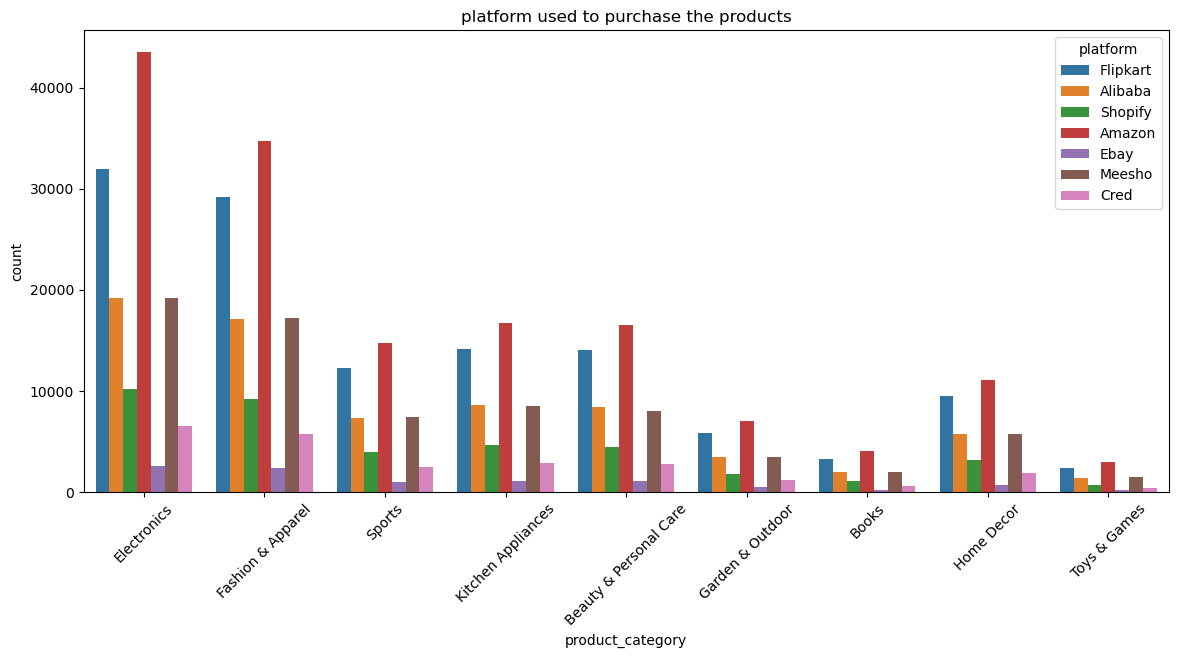

In [718]:
plt.figure(figsize=(14,6))

sns.countplot(x="product_category",data=df_trans_new,hue="platform")

plt.title("platform used to purchase the products")
plt.xticks(rotation=45)
plt.show()

In [722]:
df_trans_new["platform"].mode()[0]

'Amazon'

In [724]:
df_trans_new["platform"].fillna(df_trans_new["platform"].mode()[0],inplace=True)


In [726]:
df_trans_new.isnull().sum()

tran_id             0
cust_id             0
tran_date           0
tran_amount         0
platform            0
product_category    0
payment_type        0
dtype: int64

In [728]:
df_trans_new.describe()

,tran_id,cust_id,tran_amount
count,500000.000000,500000.000000,500000.00000
mean,250000.500000,501.400428,3225.20733
std,144337.711634,288.641924,13098.74276
min,1.000000,1.000000,0.00000
25%,125000.750000,252.000000,64.00000
50%,250000.500000,502.000000,141.00000
75%,375000.250000,752.000000,397.00000
max,500000.000000,1000.000000,69999.00000


In [736]:
df_trans_new_zero=df_trans_new[df_trans_new.tran_amount==0]
df_trans_new_zero.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
120,121,440,2023-01-01,0,Amazon,Electronics,Credit Card
141,142,839,2023-01-01,0,Amazon,Electronics,Credit Card
517,518,147,2023-01-01,0,Amazon,Electronics,Credit Card
533,534,891,2023-01-01,0,Amazon,Electronics,Credit Card
586,587,108,2023-01-01,0,Amazon,Electronics,Credit Card


In [738]:
df_trans_new_zero["platform"].value_counts()

platform
Amazon    4734
Name: count, dtype: int64

In [740]:
df_trans_new_zero.product_category.value_counts()

product_category
Electronics    4734
Name: count, dtype: int64

In [750]:
df_trans_1=df_trans_new[(df_trans_new["platform"]=="Amazon")&
            (df_trans_new["product_category"]=="Electronics")&
            (df_trans_new["payment_type"]=="Credit Card")]
df_trans_1.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
109,110,887,2023-01-01,635,Amazon,Electronics,Credit Card
120,121,440,2023-01-01,0,Amazon,Electronics,Credit Card
141,142,839,2023-01-01,0,Amazon,Electronics,Credit Card
173,174,676,2023-01-01,60439,Amazon,Electronics,Credit Card
190,191,763,2023-01-01,697,Amazon,Electronics,Credit Card


In [760]:
median_to_replace=df_trans_1[df_trans_1["tran_amount"]>0]["tran_amount"].median()
median_to_replace

554.0

In [762]:
df_trans_new["tran_amount"].replace(0,median_to_replace,inplace=True)

In [764]:
df_trans_new["tran_amount"].describe()

count    500000.000000
mean       3230.452602
std       13097.561071
min           2.000000
25%          66.000000
50%         146.000000
75%         413.000000
max       69999.000000
Name: tran_amount, dtype: float64

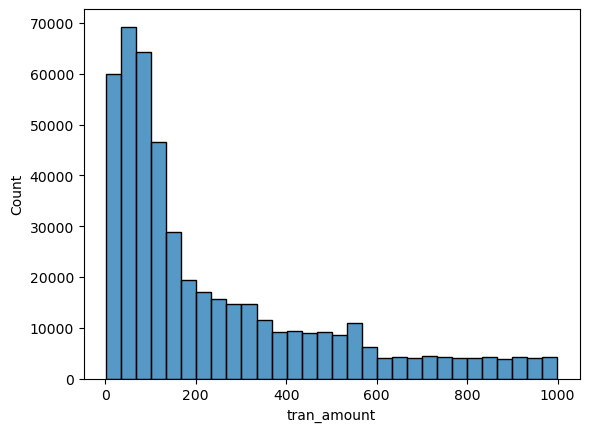

In [780]:
sns.histplot(df_trans_new[df_trans_new["tran_amount"]<10000]["tran_amount"],bins=30)

plt.show()

In [792]:
q1,q3=df_trans_new["tran_amount"].quantile([0.25,0.75])

IQR=q3-q1

print(q1,q3)
print(IQR)

66.0 413.0
347.0


In [796]:
lower =q1-(2*IQR)
upper=q3+(2*IQR)

lower,upper

(-628.0, 1107.0)

In [802]:
df_tran_outliers=df_trans_new[df_trans_new["tran_amount"]>=upper]
df_tran_outliers

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
26,27,380,2023-01-01,61963,Shopify,Beauty & Personal Care,Credit Card
49,50,287,2023-01-01,57869,Amazon,Toys & Games,Gpay
94,95,770,2023-01-01,52881,Ebay,Kitchen Appliances,Credit Card
104,105,549,2023-01-01,58574,Flipkart,Fashion & Apparel,Gpay
113,114,790,2023-01-01,51669,Shopify,Kitchen Appliances,Credit Card
...,...,...,...,...,...,...,...
499742,499743,868,2023-09-05,55131,Meesho,Fashion & Apparel,Gpay
499888,499889,614,2023-09-05,59679,Meesho,Fashion & Apparel,Net Banking
499900,499901,811,2023-09-05,60184,Flipkart,Sports,Debit Card
499966,499967,662,2023-09-05,54678,Meesho,Sports,Gpay


In [810]:
df_tran_normal=df_trans_new[df_trans_new["tran_amount"]<upper]
df_tran_normal

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking
...,...,...,...,...,...,...,...
499994,499995,679,2023-09-05,59,Ebay,Beauty & Personal Care,Gpay
499995,499996,791,2023-09-05,43,Amazon,Books,Phonepe
499997,499998,57,2023-09-05,224,Amazon,Garden & Outdoor,Phonepe
499998,499999,629,2023-09-05,538,Flipkart,Home Decor,Gpay


In [816]:
mean_imp=df_tran_normal.groupby("product_category")["tran_amount"].mean()
mean_imp

product_category
Beauty & Personal Care     92.167205
Books                      29.553515
Electronics               510.172685
Fashion & Apparel          64.553463
Garden & Outdoor          125.630277
Home Decor                302.487561
Kitchen Appliances        176.773288
Sports                    269.181631
Toys & Games               50.333298
Name: tran_amount, dtype: float64

In [814]:
df_tran_outliers

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
26,27,380,2023-01-01,61963,Shopify,Beauty & Personal Care,Credit Card
49,50,287,2023-01-01,57869,Amazon,Toys & Games,Gpay
94,95,770,2023-01-01,52881,Ebay,Kitchen Appliances,Credit Card
104,105,549,2023-01-01,58574,Flipkart,Fashion & Apparel,Gpay
113,114,790,2023-01-01,51669,Shopify,Kitchen Appliances,Credit Card
...,...,...,...,...,...,...,...
499742,499743,868,2023-09-05,55131,Meesho,Fashion & Apparel,Gpay
499888,499889,614,2023-09-05,59679,Meesho,Fashion & Apparel,Net Banking
499900,499901,811,2023-09-05,60184,Flipkart,Sports,Debit Card
499966,499967,662,2023-09-05,54678,Meesho,Sports,Gpay


In [818]:
for index,row in df_tran_outliers.iterrows():
    if row["tran_amount"]>=upper:
        df_trans_new.at[index,"tran_amount"]=mean_imp[row["product_category"]]

In [822]:
df_trans_new.loc[[26,49,94]]
                 #cross checking

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
26,27,380,2023-01-01,92.167205,Shopify,Beauty & Personal Care,Credit Card
49,50,287,2023-01-01,50.333298,Amazon,Toys & Games,Gpay
94,95,770,2023-01-01,176.773288,Ebay,Kitchen Appliances,Credit Card


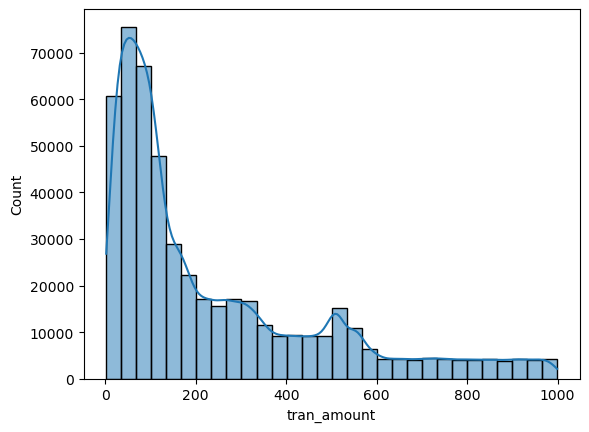

In [826]:
sns.histplot(df_trans_new["tran_amount"],bins=30,kde=True)

plt.show()

In [852]:
c=df_trans_new["payment_type"].value_counts(normalize=True)*100
c

payment_type
Phonepe        28.8456
Credit Card    27.9556
Gpay           21.8436
Debit Card     11.9000
Net Banking     8.6446
Cash            0.8106
Name: proportion, dtype: float64

In [858]:
c_names=c.index
c_values=c.values

print(c_names)
print(c_values)

Index(['Phonepe', 'Credit Card', 'Gpay', 'Debit Card', 'Net Banking', 'Cash'], dtype='object', name='payment_type')
[28.8456 27.9556 21.8436 11.9     8.6446  0.8106]


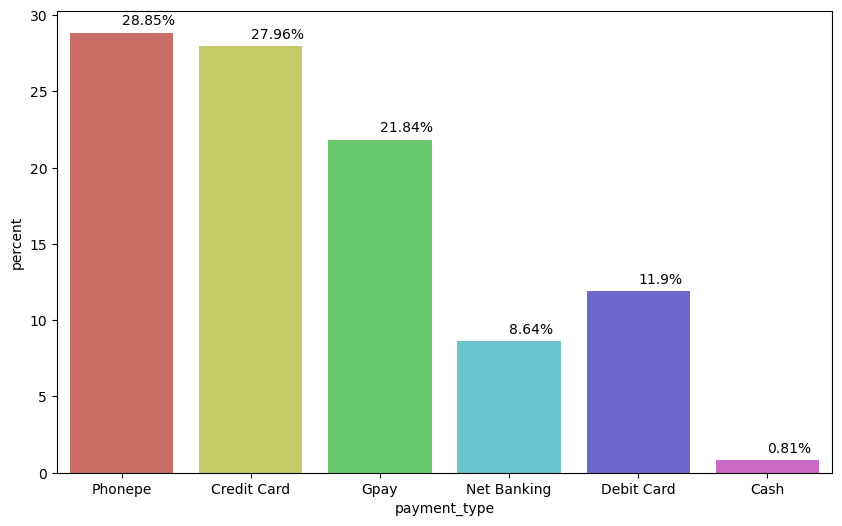

In [882]:
plt.figure(figsize=(10,6))
sns.countplot(x=df_trans_new.payment_type,stat="percent",palette="hls")

for i,j in zip(c_names,c_values):
    plt.text(i,j+0.5,(str(round(j,2))+str("%")))
plt.show()

In [912]:
df_merged_new=pd.merge(df_merged,df_trans_new,on="cust_id",how="inner")
df_merged_new.head(2)

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group,credit_score,...,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode,tran_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,...,0.0,40000.0,700-749,40000.0,1283,2023-01-01,30.0,Shopify,Fashion & Apparel,Net Banking
1,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,...,0.0,40000.0,700-749,40000.0,1382,2023-01-01,96.0,Amazon,Sports,Debit Card


In [886]:
df_merged_new.shape

(500000, 21)

In [914]:
df_merged_new.columns

Index(['cust_id', 'name', 'gender', 'age', 'location', 'occupation',
       'annual_income', 'marital_status', 'age_group', 'credit_score',
       'credit_utilisation', 'outstanding_debt',
       'credit_inquiries_last_6_months', 'credit_limit', 'credit_score_range',
       'credit_limit_mode', 'tran_id', 'tran_date', 'tran_amount', 'platform',
       'product_category', 'payment_type'],
      dtype='object')

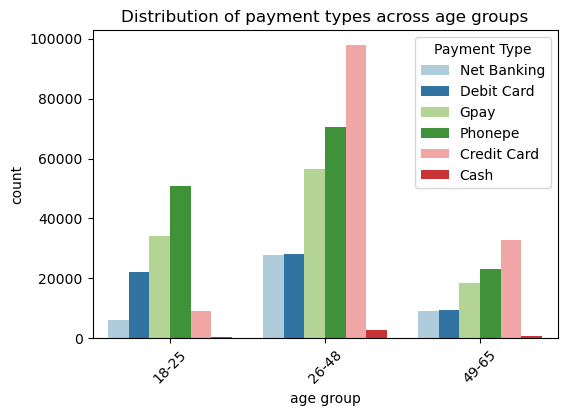

In [930]:
plt.figure(figsize=(6,4))
           
sns.countplot(x="age_group",hue="payment_type",data=df_merged_new,palette="Paired")

plt.title("Distribution of payment types across age groups")
plt.xlabel("age group")
plt.ylabel("count")

plt.xticks(rotation=45)
plt.legend(title="Payment Type",loc="upper right")
plt.show()


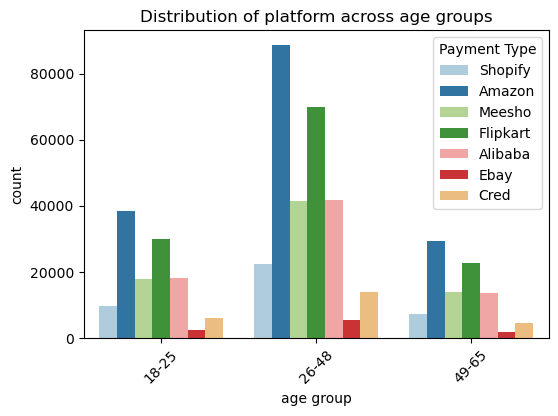

In [932]:
plt.figure(figsize=(6,4))
           
sns.countplot(x="age_group",hue="platform",data=df_merged_new,palette="Paired")

plt.title("Distribution of platform across age groups")
plt.xlabel("age group")
plt.ylabel("count")

plt.xticks(rotation=45)
plt.legend(title="Payment Type",loc="upper right")
plt.show()


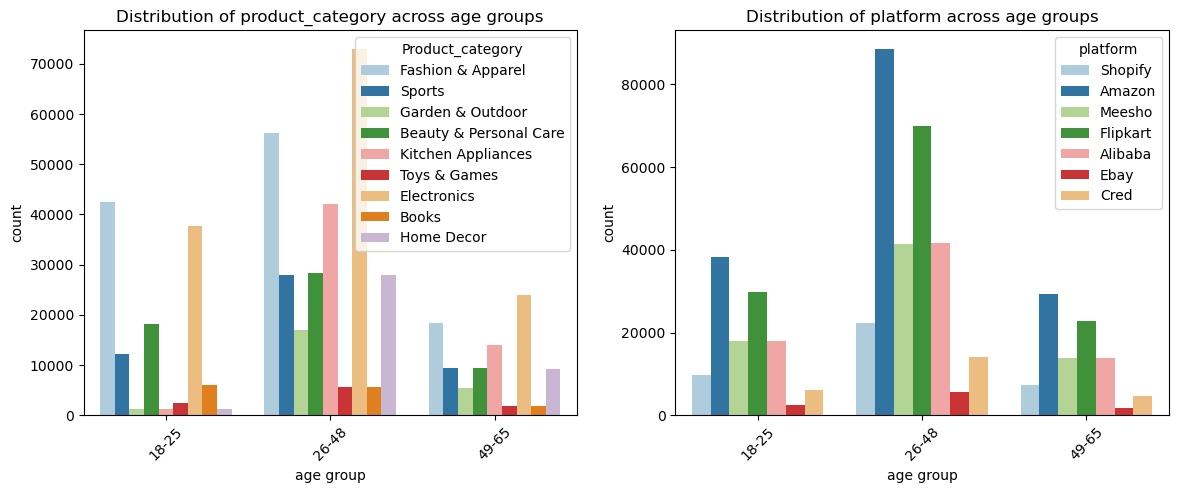

In [946]:
fig,(axes1,axes2) =plt.subplots(nrows=1,ncols=2,figsize=(14,5))

sns.countplot(x="age_group",hue="product_category",data=df_merged_new,palette="Paired",ax=axes1)

axes1.set_title("Distribution of product_category across age groups")
axes1.set_xlabel("age group")
axes1.set_ylabel("count")
axes1.legend(title="Product_category",loc="upper right")
axes1.set_xticklabels(axes1.get_xticklabels(), rotation=45)


sns.countplot(x="age_group",hue="platform",data=df_merged_new,palette="Paired",ax=axes2)

axes2.set_title("Distribution of platform across age groups")
axes2.set_xlabel("age group")
axes2.set_ylabel("count")
axes2.legend(title="platform",loc="upper right")
axes2.set_xticklabels(axes2.get_xticklabels(), rotation=45)

plt.show()

In [ ]:
#avg transcation amount

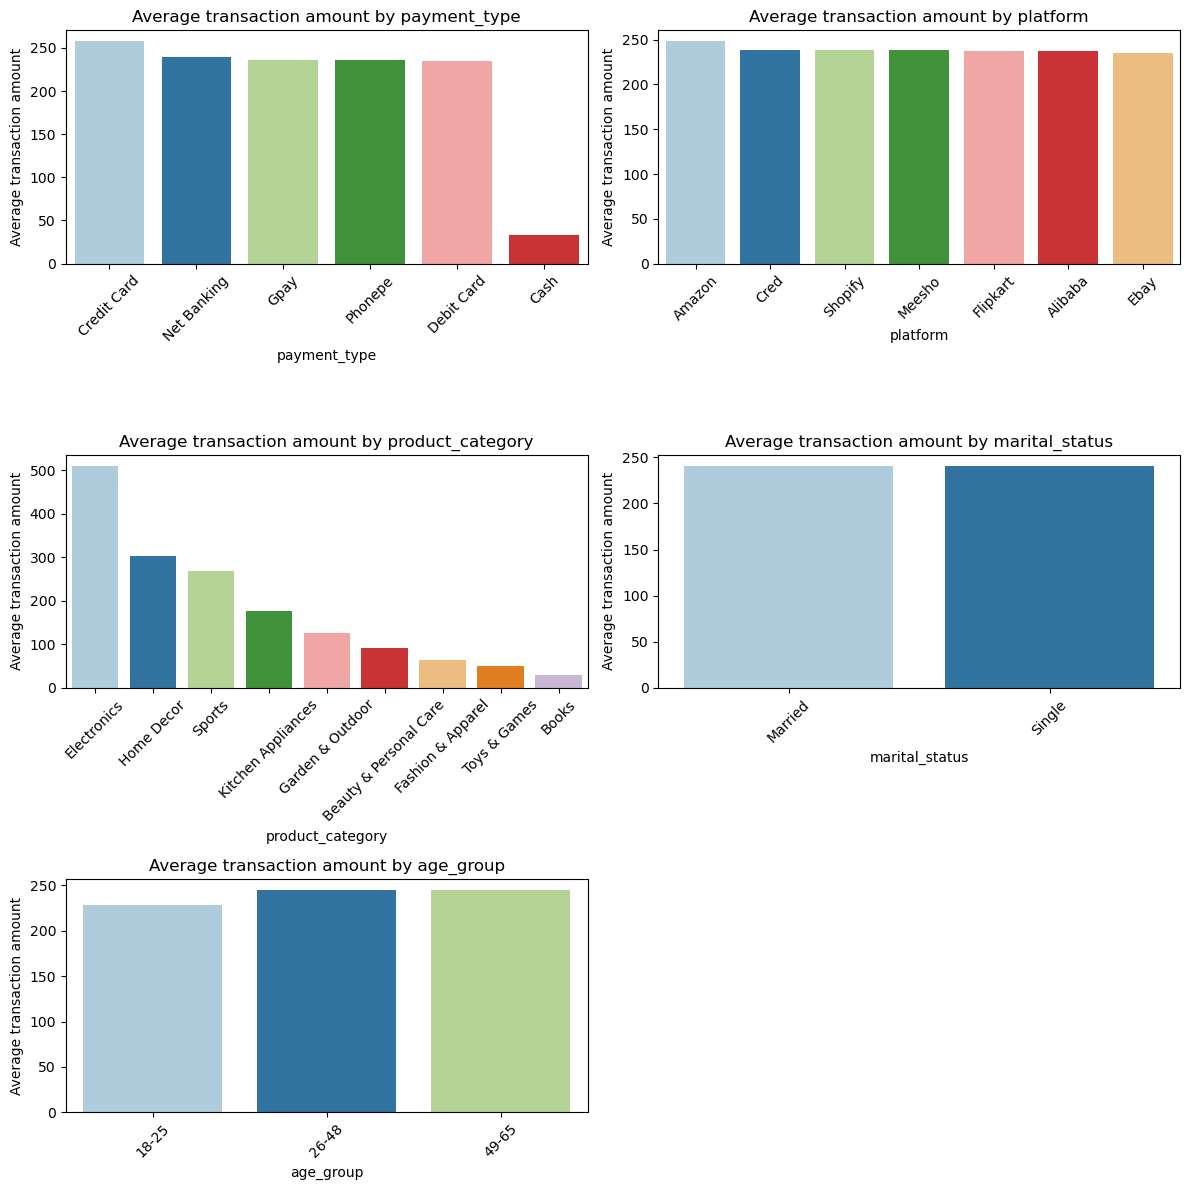

In [950]:
# List of categorical columns
cat_cols = ['payment_type', 'platform', 'product_category', 'marital_status', 'age_group']

num_rows = 3
# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 4 * num_rows))

# Flatten the axes array to make it easier to iterate
axes = axes.flatten()

# Create subplots for each categorical column
for i, cat_col in enumerate(cat_cols):
    # Calculate the average annual income for each category
    avg_tran_amount_by_category = df_merged_new.groupby(cat_col)['tran_amount'].mean().reset_index()
    
    # Sort the data by 'annual_income' before plotting
    sorted_data = avg_tran_amount_by_category.sort_values(by='tran_amount', ascending=False)
    
    sns.barplot(x=cat_col, y='tran_amount', data=sorted_data, ci=None, ax=axes[i], palette='Paired')
    axes[i].set_title(f'Average transaction amount by {cat_col}')
    axes[i].set_xlabel(cat_col)
    axes[i].set_ylabel('Average transaction amount')

    # Rotate x-axis labels for better readability
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

# Hide any unused subplots
for i in range(len(cat_cols), len(axes)):
    fig.delaxes(axes[i])
plt.tight_layout()
plt.show()

In [ ]:
#further analysis on age group


In [953]:
# Group the data by age group and calculate the average credit_limit and credit_score
age_group_metrics = df_merged_new.groupby('age_group')[['annual_income', 'credit_limit', 'credit_score']].mean().reset_index()
age_group_metrics

,age_group,annual_income,credit_limit,credit_score
0,18-25,37138.181054,1120.517803,484.708344
1,26-48,146092.690672,19945.303235,597.918043
2,49-65,260430.658253,49858.228785,701.876810


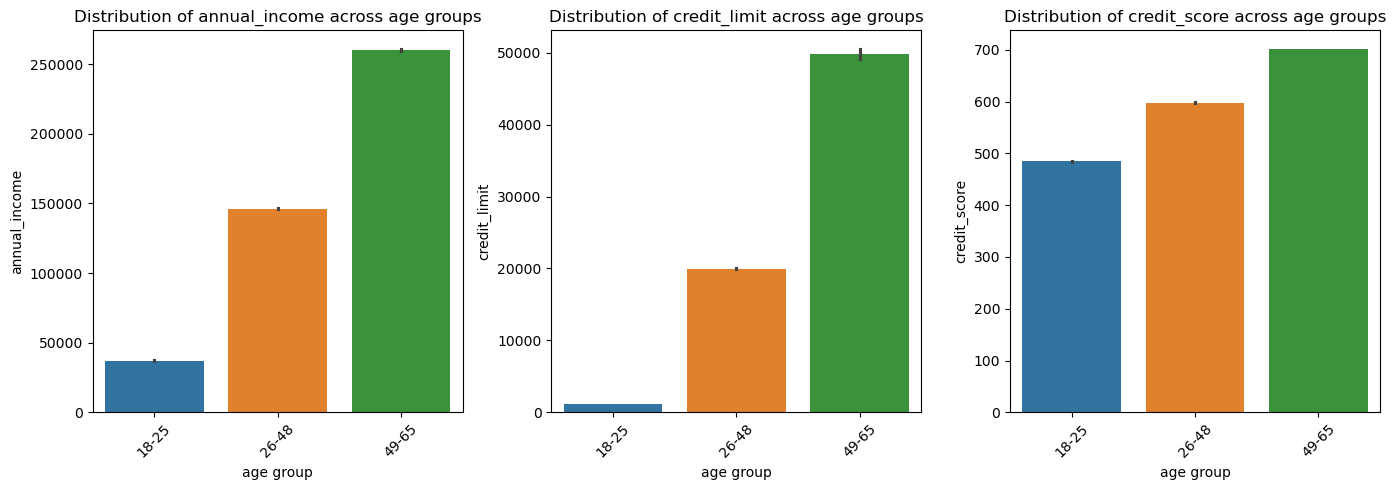

In [975]:
fig, (axes1, axes2, axes3 ) = plt.subplots(nrows=1, ncols=3, figsize=(14, 5))

sns.barplot(x="age_group",y="annual_income",data=df_merged_new,palette="tab10",ax=axes1)

axes1.set_title("Distribution of annual_income across age groups")
axes1.set_xlabel("age group")
axes1.set_ylabel("annual_income")
axes1.set_xticklabels(axes1.get_xticklabels(), rotation=45)


sns.barplot(x="age_group",y="credit_limit",data=df_merged_new,palette="tab10",ax=axes2)

axes2.set_title("Distribution of credit_limit across age groups")
axes2.set_xlabel("age group")
axes2.set_ylabel("credit_limit")

axes2.set_xticklabels(axes2.get_xticklabels(), rotation=45)

sns.barplot(x="age_group",y="credit_score",data=df_merged_new,palette="tab10",ax=axes3)

axes3.set_title("Distribution of credit_score across age groups")
axes3.set_xlabel("age group")
axes3.set_ylabel("credit_score")
axes3.set_xticklabels(axes2.get_xticklabels(), rotation=45)

plt.tight_layout()

plt.show()

#### Finalize Target Market For a Trial Credit Card Launch

1. People with age group of 18 -25 accounts to ~26% of customer base in the data
2. Avg annual income of this group is less than 50k
3. They don't have much credit history which is getting reflected in their credit score and credit limit 
4. Usage of credit cards as payment type is relatively low compared to other groups
5. Top 3 most shopping products categories : Electronics, Fashion & Apparel, Beauty & Personal care